# Programación 201

# NBA player of the week

### Ejercicio 1

# Descripción y enunciado
El objetivo de esta actividad es la gestión y preparación de datos. La gestión de datos es una parte muy importante de cualquier proceso de minería de datos, ya que los datos se deben preparar y preprocesar antes de iniciar el proceso de extracción de conocimiento.
Esta tarea ilustra algunos de los procedimientos básicos con los que nos podemos encontrar para preparar los datos: analizar los tipos de datos, tranformar valores, detectar e eliminar outliers, hacer un muestreo, etcétera.

# Fichero de datos
El conjunto de datos con el que trabajaremos en esta actividad surge de la bases de datos disponibles en Kaggle . En concreto, los datos corresponden a los jugadores nombrados jugadores de la semana desde la temporada 1984-1985 hasta la temporada 2017-2018. Estos datos nos ofrecen múltiples posibilidades para consolidar los conocimientos y competencias de manipulación de datos, preprocesado y análisis descriptivo. El fichero `NBA_player_of_the_week.csv` se encuentra adjunto.


# Ingesta de datos
Actualmente el fichero se encuentra en la misma carpeta de datos RMD, está en adjunto. Se enviará nueva práctica similar con los datos de ingesta a través de scraping / API / base de datos para R y Python.


# Valoraciones
- se valorarán los trabajos por los detalles, no vale con el solo enviar un trozo de código, sino la explicación es fundamental
- explicar además los resumen de cada sección (carga, preparación, EDA, limpieza, nuevos atributos, discretización, split train-test)
- conclusiones y comparativas son los más importantes para comenzar con Data Mining.

**Diciembre 2020**
- 1 Cargar un juego de datos
- 1.1 Leer el fichero de datos “housePrices.txt”
- 2 Consulta de los datos cargados
- 2.1 Consulta de las etiquetas de los datos
- 2.2 Consulta de datos
- 3 Preparación de los datos
- 3.1 Cambiamos los identificadores de filas y columnas
- 3.2 Filtramos los datos
- 3.3 Modificamos el contenido de los datos
- 4 Split Train-Test
- 4.1 Generamos dos conjuntos de datos train y test
- 4.2 Guardamos los ficheros train y test en formato .csv


## 1 Cargar un juego de datos
*Leer el fichero de datos “NBA_player_of_the_week.csv” y guardar los datos en un objeto con identificador denominado nba.*

In [1]:
# Lo primero cargo las librerias
import numpy as np
import pandas as pd

In [2]:
# Uso read csv para cargar el DF
nba = pd.read_csv('/home/enrique/neoland/NEOLAND-DS2020-datalabs/01-intro-101/r-rstudio/practices/02-EDA-NBA/NBA_player_of_the_week.csv')
nba

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196cm,James Harden,SG,2017-2018,2018,8,Houston Rockets,100kg,0.5
1141,25,East,"Oct 30, 2017",2013,193cm,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,95kg,0.5
1142,27,West,"Oct 30, 2017",2010,211cm,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,122kg,0.5
1143,23,East,"Oct 23, 2017",2013,211cm,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,101kg,0.5


## 2 Descripción de los datos
*Describir brevemente la estructura de los datos: qué tipo de datos contiene, número de filas y columnas y nombre de las columnas. Realizar un resumen descriptivo de los datos.*


Las filas son ls observaciones de cada jugador y se incluyen diferentes características, todas ellas cualitativas: fecha, temporada, año de elecicón en el draft, nombre, posición Etc. 
También hay columnas con datos vacios. 


In [3]:
# Para ver las estructura de datos podemos usar shape para ver las dimensiones y dtype para ver los tipos de datos que tenemos:
print(nba.shape)
print(nba.dtypes)

(1145, 13)
Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object


Las variables numericas son:   
* Age: Edad de los jugadores cuando consiguieron el galadon.
* draft year: Año en el que fueron seleccionados en el draft.
* Season short: Es el año en el que ganaron el galadron.
* Season in league: Numero de años que el jugador ha estado en la liga.  

El resto de variables son cualitativas e indican la altura, el peso, la temporada o el equipo y conferencia de procedencia deel jugador. 

In [4]:
nba.head()

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [5]:
nba.Real_value.value_counts() # Esta variable no tengo claro que significa. Quizá que el galardón ha sido compartido. 

0.5    761
1.0    384
Name: Real_value, dtype: int64

In [6]:
# Para ver los nombres de las columnas usamos keys
nba.keys()

Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season', 'Season short', 'Seasons in league', 'Team',
       'Weight', 'Real_value'],
      dtype='object')

## 3.Preparación de la base de datos
### 3.1 Asignar NA a los valores ausentes en los datos de Conference.

In [7]:
nba.Conference.value_counts(dropna = False)
# Vemos que Conference tiene 381 valores en East y 380 en West, vemos que hay 384 nulos. 

NaN     384
East    381
West    380
Name: Conference, dtype: int64

In [8]:
nba.Conference.fillna('NA', inplace=True) # Con Fillna lo que hacemos es asignar a los nulos el str NA. Read CSV por defecto ya ha cambiado los valores vacios por NaN, he aplicado esto para completar el ejercicio. En caso de haber vacios lo que tendría que haber hecho es lo siguiente:
# nba['Conference'][nba['Conference'] == "" ]= NaN

In [9]:
nba.Conference.value_counts(dropna = False)

NA      384
East    381
West    380
Name: Conference, dtype: int64

### 3.2 Transformar los datos de Conference en variable categórica y mostrar la tabla de frecuencia.

In [10]:
nba['Conference'] = nba['Conference'].astype("category")
nba['Conference'].value_counts(normalize=True)


NA      0.335371
East    0.332751
West    0.331878
Name: Conference, dtype: float64

### 3.3 Comprobar que la variable tiene xxx valores ausentes

In [11]:
nba['Conference'][nba['Conference'] == 'NA'].value_counts()

NA      384
West      0
East      0
Name: Conference, dtype: int64

### 3.4 Transformar las variables Height, Player, Position, Season, Team y Weight en variables categóricas.

In [12]:
nba['Height'] = nba['Height'].astype("category")
nba['Player'] = nba['Player'].astype("category")
nba['Position'] = nba['Position'].astype("category")
nba['Season'] = nba['Season'].astype("category")
nba['Team'] = nba['Team'].astype("category")
nba['Weight'] = nba['Weight'].astype("category")

In [13]:
# comprobamos
nba.dtypes


Age                     int64
Conference           category
Date                   object
Draft Year              int64
Height               category
Player               category
Position             category
Season               category
Season short            int64
Seasons in league       int64
Team                 category
Weight               category
Real_value            float64
dtype: object

### 3.5 Comprobar que estas variables no tienen valores perdidos.


In [14]:
# Para eso usamos isna
nba.isna().sum()

Age                  0
Conference           0
Date                 0
Draft Year           0
Height               0
Player               0
Position             0
Season               0
Season short         0
Seasons in league    0
Team                 0
Weight               0
Real_value           0
dtype: int64

### 3.6 Calcular el número de anyos que pasan entre que salio el jugador elegido en el draft y la temporada en la que fue jugador de la semana. Denomina la variable tiempo.

In [15]:
nba['tiempo'] = nba['Season short'] - nba['Draft Year'] # Simplemente resto las diferentes variables: Season short -  Draft Year
nba['tiempo']

0        7
1        3
2        6
3       16
4        7
        ..
1140     9
1141     5
1142     8
1143     5
1144     9
Name: tiempo, Length: 1145, dtype: int64

### 3.7 ¿Cual es el número de años que más veces se repite entre que salen elegidos en el draft y se proclaman mejores jugadores? (moda de la variable tiempo)


In [16]:
nba.tiempo.value_counts(sort= 'descending') # Saco un Value_count ordenado descendente, veo que el valor que más sale es 7. 

7     141
6     140
5     133
4     118
8     115
9      96
3      93
10     79
2      50
11     47
12     37
13     32
1      21
14     17
15      9
17      7
16      6
18      2
19      2
Name: tiempo, dtype: int64

### 3.8 La altura de los jugadores está expresada en pies (aquellas con guión) y cm. Convertir la altura expresada en pies a centimetros [https://www.piesametros.info/](https://www.piesametros.info/). Posteriormente, eliminar el texto “cm” de los datos de tipo altura y convertir la variable en numérica. Calcular media, desviación típica y boxplot.

In [17]:
nba_bk = nba

In [18]:
# Me creo una variable que me dice si height contiene quión o no. Los que no contienen guión contienen cm. 
nba['nocm'] = nba['Height'].str.contains('-')

In [19]:
# Hago un for que va a recorrer height y nocm para ejecutar en el caso que sea cm, lo elimine, y en el caso que hay - los transforme a cm. 
nba['Height'] = nba['Height'].astype('object') # Lo vuelvo a convertir en Objeto
for i in range(0,len(nba['Height'])): # Ejecuto el for en todo el DF
    if nba['nocm'][i] == False: # Si el valor contiene CM ejecuto un replace para que lo quite
        nba['Height'][i] = int(nba['Height'][i].replace('cm',''))
    else: # Si tiene un guión, lo que hagao es un splt para separar las dos partes del valor y multiplicar para hacer la conversión. 
        nba['Height'][i] = int(nba['Height'][i].split(sep = '-')[0])*30.5 + int(nba['Height'][i].split(sep = '-')[1])*2.5

In [20]:
nba['Height'] = nba['Height'].astype('float') # Convierto la variable en float
nba['Height']

0       195.5
1       198.0
2       198.0
3       218.5
4       205.5
        ...  
1140    196.0
1141    193.0
1142    211.0
1143    211.0
1144    196.0
Name: Height, Length: 1145, dtype: float64

In [21]:
nba= nba.drop('nocm', axis=1) # Quito la variable nocm porque no la necesito
nba

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
0,29,NA,"Apr 14, 1985",1978,195.5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0,7
1,23,NA,"Apr 7, 1985",1982,198.0,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,3
2,28,NA,"Apr 1, 1985",1979,198.0,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0,6
3,37,NA,"Mar 24, 1985",1969,218.5,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0,16
4,28,NA,"Mar 17, 1985",1978,205.5,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196.0,James Harden,SG,2017-2018,2018,8,Houston Rockets,100kg,0.5,9
1141,25,East,"Oct 30, 2017",2013,193.0,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,95kg,0.5,5
1142,27,West,"Oct 30, 2017",2010,211.0,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,122kg,0.5,8
1143,23,East,"Oct 23, 2017",2013,211.0,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,101kg,0.5,5


In [22]:
# Media
nba['Height'].mean()

200.9174672489083

In [23]:
# Desviacion tipica
nba['Height'].std()

9.365908209381423

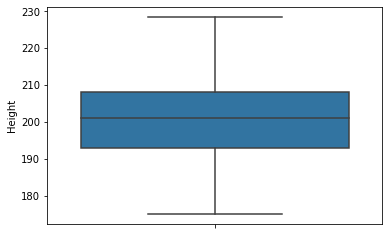

In [24]:
# Box plot
import seaborn as sns
sns.boxplot(nba['Height'], orient= 'v')

### 3.9 El peso de los jugadores está expresada en libras y kg. Convertir el peso expresado en kgs en libras [https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm](https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm). Convertir la variable en numérica.Calcular media, desviación típica y boxplot.

In [25]:
# Sigo el mismo procedimiento que con la altura. 
nba['kg'] = nba['Weight'].str.contains('kg')

In [26]:
# Hago un for que va a recorrer weight y kg. Si kg es true entonces voy a eliminar kg y aplicaré la conversión a libras. 
nba['Weight'] = nba['Weight'].astype('object') # Lo vuelvo a convertir en Objeto
for i in range(0,len(nba['Weight'])): # Ejecuto el for en todo el DF
    if nba['kg'][i] == True: # Si el valor contiene CM ejecuto un replace para que lo quite
        nba['Weight'][i] = int(nba['Weight'][i].replace('kg','')) * 2.2
    else: # si no tiene Kg, siginifica que está expresado en libras
        nba['Weight'][i] = int(nba['Weight'][i])

In [27]:
nba = nba.drop('kg', axis=1)

In [28]:
nba

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
0,29,NA,"Apr 14, 1985",1978,195.5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0,7
1,23,NA,"Apr 7, 1985",1982,198.0,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,3
2,28,NA,"Apr 1, 1985",1979,198.0,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0,6
3,37,NA,"Mar 24, 1985",1969,218.5,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0,16
4,28,NA,"Mar 17, 1985",1978,205.5,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196.0,James Harden,SG,2017-2018,2018,8,Houston Rockets,220,0.5,9
1141,25,East,"Oct 30, 2017",2013,193.0,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,209,0.5,5
1142,27,West,"Oct 30, 2017",2010,211.0,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,268.4,0.5,8
1143,23,East,"Oct 23, 2017",2013,211.0,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,222.2,0.5,5


In [29]:
nba['Weight'].mean()

225.96716157205253

In [30]:
nba['Weight'].std()

31.5782484289721

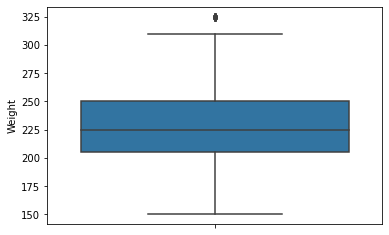

In [31]:
sns.boxplot(nba['Weight'], orient= 'v')

### 4 Información sobre posiciones en el campo y equipos.
#### 4.1 Fusionar las categorias de posición en el campo F,F-C y FC en la categoría genérica Forward. Fusionar las categorias G,G-F y GF en la categoria genérica Guard. Renombrar la categoría ‘PG’ como ‘Point Guard’, ‘SG’ como ‘Shooting Guard’, ‘SF’ como ‘Small Forward’, ‘PF’ como ‘Power Forward’ y ‘C’ como ‘Center’.

In [32]:
Forward = ["F","F-C","FC"] # Creo Forward y Guard
Guard = ["G","G-F", "GF"]
nba['Position'] = nba['Position'].astype('object')

In [33]:
# Puedo usar la función loc para localizar las posiciones y cambiarles el nombre
nba.loc[nba['Position'].isin(Forward),'Position' ] = 'Forward'
nba.loc[nba['Position'].isin(Guard),'Position' ] = 'Guard'
nba.loc[nba['Position'] == 'PG','Position' ] = 'Point Guard'
nba.loc[nba['Position'] == 'SG','Position' ] = 'Shooting Guard'
nba.loc[nba['Position']== 'SF','Position' ] = 'Small Forward'
nba.loc[nba['Position']== 'PF','Position' ] = 'Power Forward'
nba.loc[nba['Position']== 'C','Position' ] = 'Center'

In [34]:
nba.Position.value_counts() # Compribación. 

Guard             228
Forward           217
Shooting Guard    164
Center            158
Power Forward     139
Point Guard       120
Small Forward     119
Name: Position, dtype: int64

#### 4.2 ¿En que posición ha sido más veces los jugadores de la semana nombrados?

In [36]:
# en la de guard, en la comprobación se ve en el value Count

#### 4.3 ¿Cuántos equipos distintos hay?

In [38]:
len(nba['Team'].unique())

35

#### 4.4 ¿Cuáles son los cinco equipos que más veces han sido nombrados sus jugadores como jugador de la semana?

In [44]:
nba.Team.value_counts()[0:5] # son Lakers, Spurs, Cavaliers, Heat y Rockets. 

Los Angeles Lakers     71
San Antonio Spurs      61
Cleveland Cavaliers    59
Miami Heat             57
Houston Rockets        56
Name: Team, dtype: int64

### 5 Información sobre jugadores. Estadísticos descriptivos.
#### 5.1 Crear una base datos denominada nba.unique en la que no se repita el nombre de ningún jugador.Trabajar a partir de ahora con esta base de datos.

In [46]:
nba.unique = nba.drop_duplicates('Player')

In [47]:
nba.unique

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
0,29,NA,"Apr 14, 1985",1978,195.5,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189,1.0,7
1,23,NA,"Apr 7, 1985",1982,198.0,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205,1.0,3
2,28,NA,"Apr 1, 1985",1979,198.0,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220,1.0,6
3,37,NA,"Mar 24, 1985",1969,218.5,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225,1.0,16
4,28,NA,"Mar 17, 1985",1978,205.5,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,25,East,"Apr 2, 2018",2013,193.0,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,209,0.5,5
1115,26,East,"Jan 29, 2018",2012,203.0,Khris Middleton,Small Forward,2017-2018,2018,5,Milwaukee Bucks,233.2,0.5,6
1123,24,East,"Jan 2, 2018",2012,196.0,Bradley Beal,Shooting Guard,2017-2018,2018,5,Washington Wizards,206.8,0.5,6
1137,25,East,"Nov 13, 2017",2011,206.0,Tobias Harris,Forward,2017-2018,2018,6,Detroit Pistons,235.4,0.5,7


In [ ]:
#### 5.2 Listar el nombre de los 10 jugadores más bajos que han sido nombrados alguna vez jugadores de la semana. No debe repetirse ningún nombre.

In [54]:
nba.unique = nba.unique.sort_values(['Height'], ascending=True) # Ordeno el DF por la altura de los jugadores
jugadores_bajos = nba.unique['Player'][0:10] # selecciono los 10 primeros de la lista
jugadores_bajos

967         Isaiah Thomas
893         Nate Robinson
110         Michael Adams
858             Ty Lawson
273       Terrell Brandon
727         Jameer Nelson
329     Darrell Armstrong
1014           J.J. Barea
611             T.J. Ford
586            Chris Paul
Name: Player, dtype: category
Categories (274, object): [Aaron McKie, Adrian Dantley, Al Harrington, Al Horford, ..., Xavier McDaniel, Yao Ming, Zach Randolph, Zydrunas Ilgauskas]

#### 5.3 Listar el nombre de los 10 jugadores más altos que han sido nombrados y mostrar su altura. No debe repetirse ningún nombre.


In [56]:
jugadores_altos = nba.unique['Player'][264:274] # selecciono los 10 útimos de la lista
jugadores_altos

868              Marc Gasol
206        Shaquille O'Neal
234             Vlade Divac
188         Dikembe Mutombo
3       Kareem Abdul-Jabbar
256         Arvydas Sabonis
483      Zydrunas Ilgauskas
1139     Kristaps Porzingis
236               Rik Smits
486                Yao Ming
Name: Player, dtype: category
Categories (274, object): [Aaron McKie, Adrian Dantley, Al Harrington, Al Horford, ..., Xavier McDaniel, Yao Ming, Zach Randolph, Zydrunas Ilgauskas]

### 6 Eliminación de outliers.
#### 6.1 Eliminar los outliers de la variable peso (Weight) y guardar en un data frame nba.avg

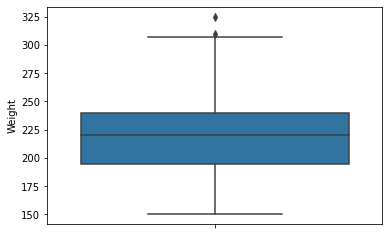

In [59]:
sns.boxplot(nba.unique['Weight'], orient= 'v') # veo que hay dos valores outliers

In [62]:
nba.unique.sort_values(['Weight'], ascending=False) # Ordeno el Df por peso y veo que los dos primeros valores que son los que habría que quitar son 325 y 310

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
206,20,NA,"Nov 15, 1992",1992,216.0,Shaquille O'Neal,Center,1992-1993,1993,0,Orlando Magic,325,1.0,1
486,23,West,"Mar 7, 2004",2002,228.5,Yao Ming,Center,2003-2004,2004,1,Houston Rockets,310,0.5,2
878,27,West,"Apr 8, 2013",2008,210.5,Nikola Pekovic,Power Forward,2012-2013,2013,2,Minnesota Timberwolves,307,0.5,5
625,22,East,"Mar 4, 2007",2004,208.0,Al Jefferson,Forward,2006-2007,2007,2,Boston Celtics,289,0.5,3
726,21,West,"Jan 26, 2009",2005,213.5,Andrew Bynum,Center,2008-2009,2009,3,Los Angeles Lakers,285,0.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,23,NA,"Jan 23, 1994",1991,183.0,Kenny Anderson,Point Guard,1993-1994,1994,2,New Jersey Nets,168,1.0,3
611,22,East,"Nov 7, 2005",2003,183.0,T.J. Ford,Point Guard,2005-2006,2006,2,Milwaukee Bucks,165,0.5,3
278,21,NA,"Apr 13, 1997",1996,183.0,Allen Iverson,Guard,1996-1997,1997,0,Philadelphia Sixers,165,1.0,1
110,26,NA,"Dec 11, 1988",1985,177.5,Michael Adams,Point Guard,1988-1989,1989,3,Denver Nuggets,163,1.0,4


In [63]:
nba_avg = nba.unique[nba.unique['Weight'] < 310] # aplico un  filtro al Df y lo guardo en un nuevo Df llamado nba_avg como dice el enunciado. 

In [65]:
nba_avg.sort_values(['Weight'], ascending=False) # ordeno ese DF por peso y veo que ya no aparecen los dos valores que había antes. 

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
878,27,West,"Apr 8, 2013",2008,210.5,Nikola Pekovic,Power Forward,2012-2013,2013,2,Minnesota Timberwolves,307,0.5,5
625,22,East,"Mar 4, 2007",2004,208.0,Al Jefferson,Forward,2006-2007,2007,2,Boston Celtics,289,0.5,3
726,21,West,"Jan 26, 2009",2005,213.5,Andrew Bynum,Center,2008-2009,2009,3,Los Angeles Lakers,285,0.5,4
198,23,NA,"Jan 10, 1993",1989,208.0,Shawn Kemp,Center,1992-1993,1993,3,Seattle SuperSonics,280,1.0,4
222,23,NA,"Jan 2, 1994",1992,205.5,Oliver Miller,Center,1993-1994,1994,1,Phoenix Suns,280,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,23,NA,"Jan 23, 1994",1991,183.0,Kenny Anderson,Point Guard,1993-1994,1994,2,New Jersey Nets,168,1.0,3
611,22,East,"Nov 7, 2005",2003,183.0,T.J. Ford,Point Guard,2005-2006,2006,2,Milwaukee Bucks,165,0.5,3
278,21,NA,"Apr 13, 1997",1996,183.0,Allen Iverson,Guard,1996-1997,1997,0,Philadelphia Sixers,165,1.0,1
110,26,NA,"Dec 11, 1988",1985,177.5,Michael Adams,Point Guard,1988-1989,1989,3,Denver Nuggets,163,1.0,4


#### 6.2 Comparar los boxplots de los datos originales en nba.unique y de los datos del peso de nba.avg

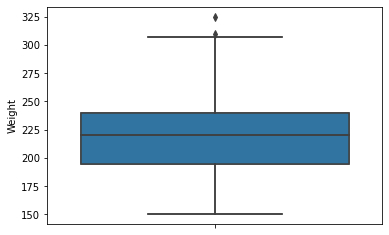

In [68]:
sns.boxplot(nba.unique['Weight'], orient= 'v') 

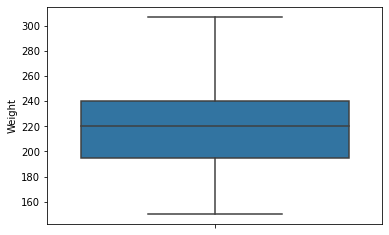

In [69]:
sns.boxplot(nba_avg['Weight'], orient= 'v')  # En els egundo gráfico vemos que los outliers han desaparecido. 

#### 6.3 Interpretar los resultados

In [79]:
# Para comparar los resultados voy a usar describe
nba.unique['Weight'].astype('float').describe()

count    274.000000
mean     219.056934
std       29.407875
min      150.000000
25%      195.000000
50%      220.000000
75%      240.000000
max      325.000000
Name: Weight, dtype: float64

In [80]:
nba_avg['Weight'].astype('float').describe()

count    272.000000
mean     218.333088
std       28.262059
min      150.000000
25%      195.000000
50%      220.000000
75%      240.000000
max      307.000000
Name: Weight, dtype: float64

Lo que observamos es que al eliminar los outlaiers se han reducido el numero de observaciones (274 a 272), la media (219 a 218.3) y la desviación típica (29.4 a 28.26). Lo cual tiene sentido ya que hemos quitado los elementos que tenian un valor más alto. Por otrro lado, lo cuantiles se mantienes sin variación salvo el máximo que pasa de 325 a 307.


## 7 Clasificación de jugadores
#### 7.1 Añadir una columna al conjunto de datos denominada “Altura” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende de la altura de cada jugador. Se asigna:
- bajo: los 50 jugadores más bajos
- alto: los 50 jugadores más altos
- normal: el resto de jugadores

In [132]:
bajo = nba.unique['Player'][0:50]
alto = nba.unique['Player'][224:274]
normal = nba.unique['Player'][50:224]

In [133]:
# Uso .loc para crear la nueva variable y añadir las nuevas categorias
nba.loc[nba['Player'].isin(bajo), 'Altura'] = 'bajo'
nba.loc[nba['Player'].isin(normal), 'Altura'] = 'normal'
nba.loc[nba['Player'].isin(alto), 'Altura'] = 'alto'

In [134]:
nba

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo,Altura,Peso
0,29,NA,"Apr 14, 1985",1978,195.5,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189,1.0,7,bajo,bajo
1,23,NA,"Apr 7, 1985",1982,198.0,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205,1.0,3,normal,normal
2,28,NA,"Apr 1, 1985",1979,198.0,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220,1.0,6,normal,normal
3,37,NA,"Mar 24, 1985",1969,218.5,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225,1.0,16,normal,normal
4,28,NA,"Mar 17, 1985",1978,205.5,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220,1.0,7,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196.0,James Harden,Shooting Guard,2017-2018,2018,8,Houston Rockets,220,0.5,9,normal,normal
1141,25,East,"Oct 30, 2017",2013,193.0,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,209,0.5,5,normal,normal
1142,27,West,"Oct 30, 2017",2010,211.0,DeMarcus Cousins,Center,2017-2018,2018,7,New Orleans Pelicans,268.4,0.5,8,alto,alto
1143,23,East,"Oct 23, 2017",2013,211.0,Giannis Antetokounmpo,Forward,2017-2018,2018,4,Milwaukee Bucks,222.2,0.5,5,normal,normal


#### 7.2 Añadir una columna al conjunto de datos denominada “Peso” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende del peso de cada jugador. Se asigna:
- bajo: los 50 jugadores con menor peso
- alto: los 50 jugadores con mayor peso
- normal: el resto de jugadores

In [135]:
# hago lo mismo que con la altura pero primero tengo que ordenarlo por peso. 
nba.unique = nba.unique.sort_values(['Weight'], ascending=True)
bajo = nba.unique['Player'][0:50]
alto = nba.unique['Player'][224:274]
normal = nba.unique['Player'][50:224]

In [136]:
nba.loc[nba['Player'].isin(bajo), 'Peso'] = 'bajo'
nba.loc[nba['Player'].isin(normal), 'Peso'] = 'normal'
nba.loc[nba['Player'].isin(alto), 'Peso'] = 'alto'

In [137]:
nba

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo,Altura,Peso
0,29,NA,"Apr 14, 1985",1978,195.5,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189,1.0,7,bajo,bajo
1,23,NA,"Apr 7, 1985",1982,198.0,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205,1.0,3,normal,normal
2,28,NA,"Apr 1, 1985",1979,198.0,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220,1.0,6,normal,normal
3,37,NA,"Mar 24, 1985",1969,218.5,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225,1.0,16,normal,normal
4,28,NA,"Mar 17, 1985",1978,205.5,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220,1.0,7,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196.0,James Harden,Shooting Guard,2017-2018,2018,8,Houston Rockets,220,0.5,9,normal,normal
1141,25,East,"Oct 30, 2017",2013,193.0,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,209,0.5,5,normal,normal
1142,27,West,"Oct 30, 2017",2010,211.0,DeMarcus Cousins,Center,2017-2018,2018,7,New Orleans Pelicans,268.4,0.5,8,alto,alto
1143,23,East,"Oct 23, 2017",2013,211.0,Giannis Antetokounmpo,Forward,2017-2018,2018,4,Milwaukee Bucks,222.2,0.5,5,normal,normal


#### 7.3 Calcular la media y desviación típica del peso (Weight) según la clasificación de altura de los jugadores.

In [138]:
nba['Weight'] = nba['Weight'].astype('float')
pd.pivot_table(nba,"Weight",index=["Altura"],aggfunc=np.mean)

,Weight
Altura,
alto,262.602492
bajo,178.146341
normal,220.031818


In [139]:
pd.pivot_table(nba,"Weight",index=["Altura"],aggfunc=np.std)

,Weight
Altura,
alto,20.070993
bajo,8.423575
normal,16.117174


#### 7.4 Realizar un boxplot del peso (Weight) según la clasificación de altura del jugador. Los boxplots deben estar ordenados de menos a mayor altura.

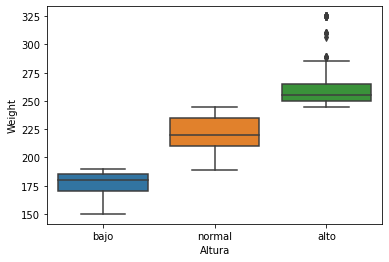

In [144]:
sns.boxplot(x =nba['Altura'], y = nba['Weight'])

#### 7.5 Hacer un listado con el nombre de jugadores que tienen una altura ‘normal’ y un peso ‘alto’. Ordenar alfabéticamente por nombre.

In [164]:
jugadores = nba.unique['Player'][(nba.unique['Altura'] == 'normal') & (nba.unique['Peso'] == 'alto')] # aplico un dobre filtro. 


In [166]:
len(jugadores)

22